In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1

In [2]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
df = pd.read_csv(path)
df.head()

car_id              model  car_type fuel_type  car_rating  \
0  y13744087j     Kia Rio X-line   economy    petrol        3.78   
1  O41613818T         VW Polo VI   economy    petrol        3.90   
2  d-2109686j    Renault Sandero  standart    petrol        6.30   
3  u29695600e  Mercedes-Benz GLC  business    petrol        4.04   
4  N-8915870N    Renault Sandero  standart    petrol        4.70   

   year_to_start  riders  year_to_work  target_reg target_class  
0           2015   76163          2021      108.53  another_bug  
1           2015   78218          2021       35.20  electro_bug  
2           2012   23340          2017       38.62   gear_stick  
3           2011    1263          2020       30.34  engine_fuel  
4           2012   26428          2017       30.45  engine_fuel

In [7]:
pd.crosstab(df['target_class'], df['model'])['MINI CooperSE']

target_class
another_bug        6
break_bug          4
electro_bug        0
engine_check       3
engine_fuel        0
engine_ignition    2
engine_overheat    4
gear_stick         2
wheel_shake        0
Name: MINI CooperSE, dtype: int64

In [10]:
pd.crosstab(df['car_type'], df['target_class'])['wheel_shake']

car_type
business      0
economy     165
premium       0
standart      0
Name: wheel_shake, dtype: int64

In [18]:
pd.crosstab(df['car_type'], df['target_class'], margins=True).loc[:, 'All'].sort_values(ascending=False)

car_type
All         2337
economy     1536
standart     599
business     117
premium       85
Name: All, dtype: int64

In [22]:
pd.crosstab(df['target_class'], df['model'], margins=True).loc[:, 'All'].sort_values()

target_class
wheel_shake         165
electro_bug         249
engine_fuel         262
engine_ignition     269
break_bug           270
engine_check        270
another_bug         279
gear_stick          284
engine_overheat     289
All                2337
Name: All, dtype: int64

In [25]:
pd.crosstab(df['target_class'], df['model'], margins=True).loc['engine_ignition'].sort_values(ascending=False)

model
All                   269
Nissan Qashqai         30
Renault Sandero        23
Kia Rio X              20
Smart ForFour          20
Hyundai Solaris        17
Smart Coupe            17
VW Tiguan              16
Skoda Rapid            16
VW Polo VI             15
Kia Sportage           15
Kia Rio X-line         14
Smart ForTwo           14
VW Polo                12
Kia Rio                12
Renault Kaptur         11
Mini Cooper             3
BMW 320i                3
Audi A4                 2
MINI CooperSE           2
Tesla Model 3           2
Audi A3                 2
Fiat 500                1
Audi Q3                 1
Volkswagen ID.4         1
Mercedes-Benz GLC       0
Mercedes-Benz E200      0
Name: engine_ignition, dtype: int64

2

In [26]:
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")
rides_info.head()

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  n14703870u  y13744087j     Q1Z  2020-01-01    5.72            220   
1  W18144322F  y13744087j     M1P  2020-01-01    2.52          37392   
2  Q11878237R  y13744087j     D1j  2020-01-02    7.17             45   
3  r92216797N  y13744087j     s1D  2020-01-02    6.19             10   
4  s16802374w  y13744087j     d1v  2020-01-03    3.14             49   

   ride_cost  speed_avg  speed_max  stop_times  ...  riders  year_to_work  \
0       3514         42        NaN           6  ...   76163          2021   
1     523483         45  53.000000           2  ...   76163          2021   
2        444         54  82.000000           0  ...   76163          2021   
3        105         35  40.000000           0  ...   76163          2021   
4        486         54  85.845615           1  ...   76163          2021   

   target_reg  target_class age user_rating user_rides  user_time_accident  \
0      108.53   another_bug  38         7.4        268                 2.0   
1      108.53   another_bug  46         6.7        643                 3.0   
2      108.53   another_bug  49         8.4        161                 NaN   
3      108.53   another_bug  37         8.3       1548                 NaN   
4      108.53   another_bug  22         9.0         36                15.0   

   sex  first_ride_date  
0    0         2019-9-7  
1    0        2020-7-28  
2    0        2020-3-23  
3    1         2018-7-7  
4    1       2019-11-24  

[5 rows x 29 columns]

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


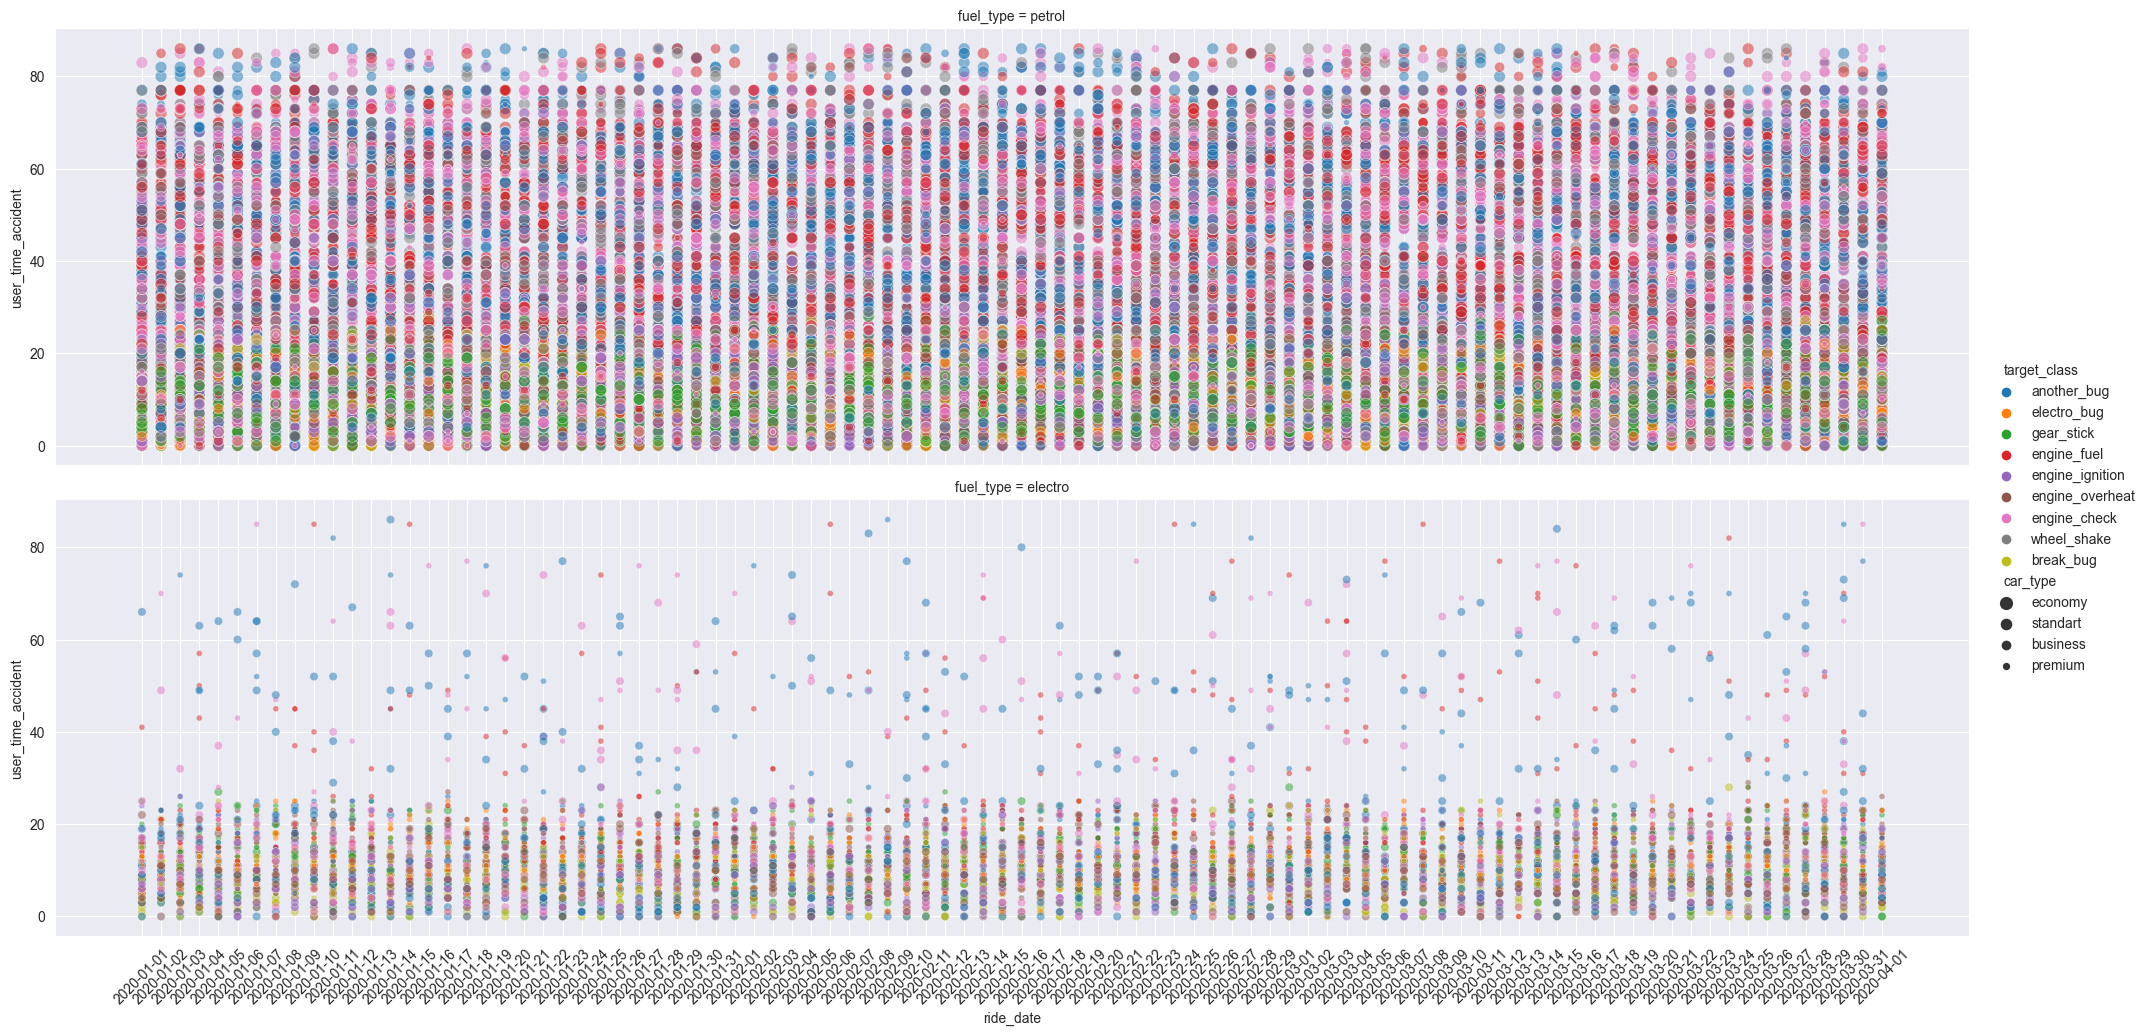

In [32]:
params = {'data' : rides_info,

          'kind' : 'scatter',
          'x' : 'ride_date',
          'y' : 'user_time_accident',
          'row' : 'fuel_type',
          'hue' : 'target_class',
          'size' : 'car_type',

          'aspect' : 4,
          'alpha' : 0.5}

g = sns.relplot(**params)
plt.xticks(rotation=45);